In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
with open('UN_data_clean.pickle', 'rb') as file:
    UN = pickle.load(file)
    file.close()
UN.head()

Country  Year     gdp  pop_density    pop  gender_ratio      exp_imp  \
0  Afghanistan  2005   264.0         38.4  25.07         107.2  -237.674511   
1  Afghanistan  2010   558.0         44.1  28.80         105.7  -165.486111   
2  Afghanistan  2015   611.0         51.7  33.74         106.4  -211.944280   
3      Albania  2005  2615.0        112.4   3.08         100.6  -635.064935   
4      Albania  2010  4056.0        107.3   2.94         100.7 -1038.435374   

     edu_prim   gva_ag  gva_indst  ...    cpi  mort_child  life_exp  \
0  172.270403  35.2479    25.9585  ...   71.1        89.5      56.9   
1  183.309931  28.8094    21.3476  ...  100.0        76.7      60.0   
2  187.720658  22.6614    22.6744  ...  132.1        68.6      62.3   
3   77.264610  21.5420    28.6709  ...   86.7        21.1      74.8   
4   76.456122  20.6582    28.6905  ...  100.0        16.8      75.6   

   mort_mother  pop_gain  num_child  pop_migrants     pop_unhcr  urban  \
0        821.0       4.4        7.2           0.3   6366.055046   22.7   
1        584.0       2.8        6.4           0.4  41666.215278   23.7   
2        396.0       3.2        5.3           1.5  42128.601067   24.8   
3         30.0      -0.3        1.9           2.1     29.870130   46.7   
4         30.0      -0.9        1.6           1.8     33.673469   52.2   

   ghg_emissions  
0           0.76  
1           1.06  
2           1.40  
3           2.68  
4           2.83  

[5 rows x 30 columns]

In [3]:
UN.iloc[:, 2:].corr()

gdp  pop_density       pop  gender_ratio   exp_imp  \
gdp            1.000000     0.156314 -0.041860      0.237837  0.231530   
pop_density    0.156314     1.000000  0.012145      0.034543  0.133988   
pop           -0.041860     0.012145  1.000000      0.005359  0.001297   
gender_ratio   0.237837     0.034543  0.005359      1.000000  0.487056   
exp_imp        0.231530     0.133988  0.001297      0.487056  1.000000   
edu_prim      -0.185564     0.117830 -0.053110     -0.042969 -0.087188   
gva_ag        -0.515436    -0.116249  0.009689     -0.118156 -0.068771   
gva_indst      0.047624    -0.065720  0.073867      0.308102  0.523520   
gva_servc      0.403400     0.160772 -0.075836     -0.178793 -0.418422   
labor_part     0.037848     0.007202  0.001855      0.186697  0.134817   
unemp         -0.113815    -0.095381 -0.108971     -0.188192 -0.163781   
energy_prod    0.411713    -0.034051 -0.046238      0.672916  0.721038   
energy_supp    0.684159     0.097474 -0.031838      0.466290  0.391022   
internet       0.755579     0.149125 -0.025641      0.110307  0.068623   
tourism        0.503543     0.182027 -0.101004      0.285127 -0.077366   
health         0.318716    -0.061397 -0.071765     -0.218219 -0.184048   
parliam_women  0.276799    -0.007303 -0.015954     -0.195895 -0.012487   
food_prod     -0.148322    -0.071135  0.066827      0.091592  0.122148   
cpi           -0.030475    -0.010073  0.013244     -0.004555 -0.004927   
mort_child    -0.532937    -0.134027  0.006443     -0.074916  0.005664   
life_exp       0.597664     0.163401  0.020688      0.089483  0.010926   
mort_mother   -0.394982    -0.096360 -0.027927     -0.069081 -0.001746   
pop_gain      -0.035052     0.042966 -0.052298      0.618976  0.364118   
num_child     -0.457087    -0.137198 -0.071971      0.000995  0.029084   
pop_migrants   0.575468     0.241032 -0.108853      0.688922  0.336955   
pop_unhcr     -0.067579    -0.020289 -0.063171     -0.035735 -0.085761   
urban          0.593666     0.143835 -0.053148      0.188088  0.188993   
ghg_emissions  0.542799     0.028915 -0.041514      0.445440  0.443236   

               edu_prim    gva_ag  gva_indst  gva_servc  labor_part  ...  \
gdp           -0.185564 -0.515436   0.047624   0.403400    0.037848  ...   
pop_density    0.117830 -0.116249  -0.065720   0.160772    0.007202  ...   
pop           -0.053110  0.009689   0.073867  -0.075836    0.001855  ...   
gender_ratio  -0.042969 -0.118156   0.308102  -0.178793    0.186697  ...   
exp_imp       -0.087188 -0.068771   0.523520  -0.418422    0.134817  ...   
edu_prim       1.000000  0.288114  -0.137734  -0.123971    0.184948  ...   
gva_ag         0.288114  1.000000  -0.369845  -0.529274    0.232905  ...   
gva_indst     -0.137734 -0.369845   1.000000  -0.592528   -0.067675  ...   
gva_servc     -0.123971 -0.529274  -0.592528   1.000000   -0.140385  ...   
labor_part     0.184948  0.232905  -0.067675  -0.140385    1.000000  ...   
unemp          0.015896 -0.215059  -0.009811   0.195424   -0.339536  ...   
energy_prod   -0.130362 -0.256262   0.500685  -0.234971    0.163003  ...   
energy_supp   -0.199556 -0.458127   0.300687   0.122638    0.099374  ...   
internet      -0.315102 -0.608794  -0.019728   0.545825   -0.087042  ...   
tourism       -0.114449 -0.343560  -0.116430   0.404223    0.091624  ...   
health        -0.097234 -0.036644  -0.442784   0.435901   -0.097219  ...   
parliam_women -0.018965 -0.149447  -0.044234   0.169769    0.128072  ...   
food_prod      0.105161  0.256867   0.067213  -0.284067    0.212276  ...   
cpi           -0.001691  0.012327  -0.004830  -0.006417   -0.003698  ...   
mort_child     0.363879  0.722024  -0.044022  -0.585900    0.240813  ...   
life_exp      -0.343502 -0.666406   0.029123   0.551259   -0.270414  ...   
mort_mother    0.341752  0.703476  -0.135994  -0.485783    0.277097  ...   
pop_gain       0.254970  0.254519   0.191114  -0.395185    0.282824  ...   
num_child      0.411472  0.661995  -0.064990  -0.

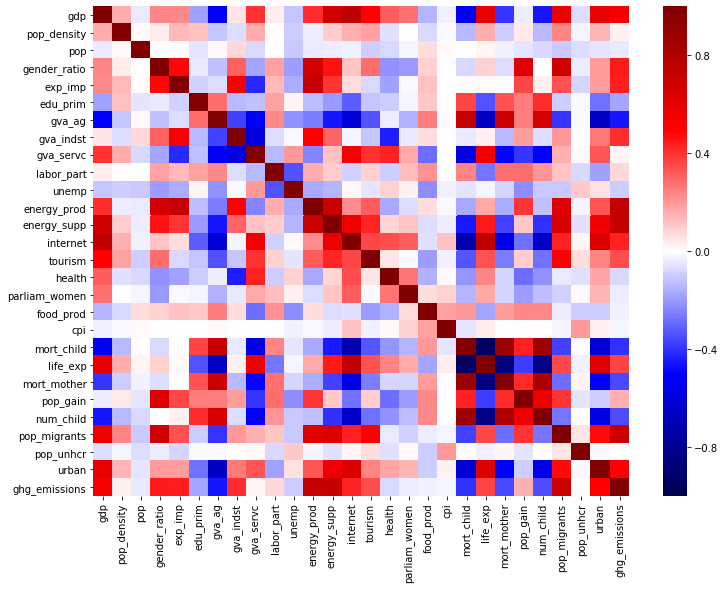

In [4]:
# Correlation matrix shown as heatmap
plt.figure(figsize = (12,9))
sns.heatmap(UN.iloc[:, 2:].corr(), cmap = "seismic", annot = False, vmin = -1, vmax = 1)

plt.savefig('correlation_matrix_heatmap.png', dpi = 100, bbox_inches = 'tight')

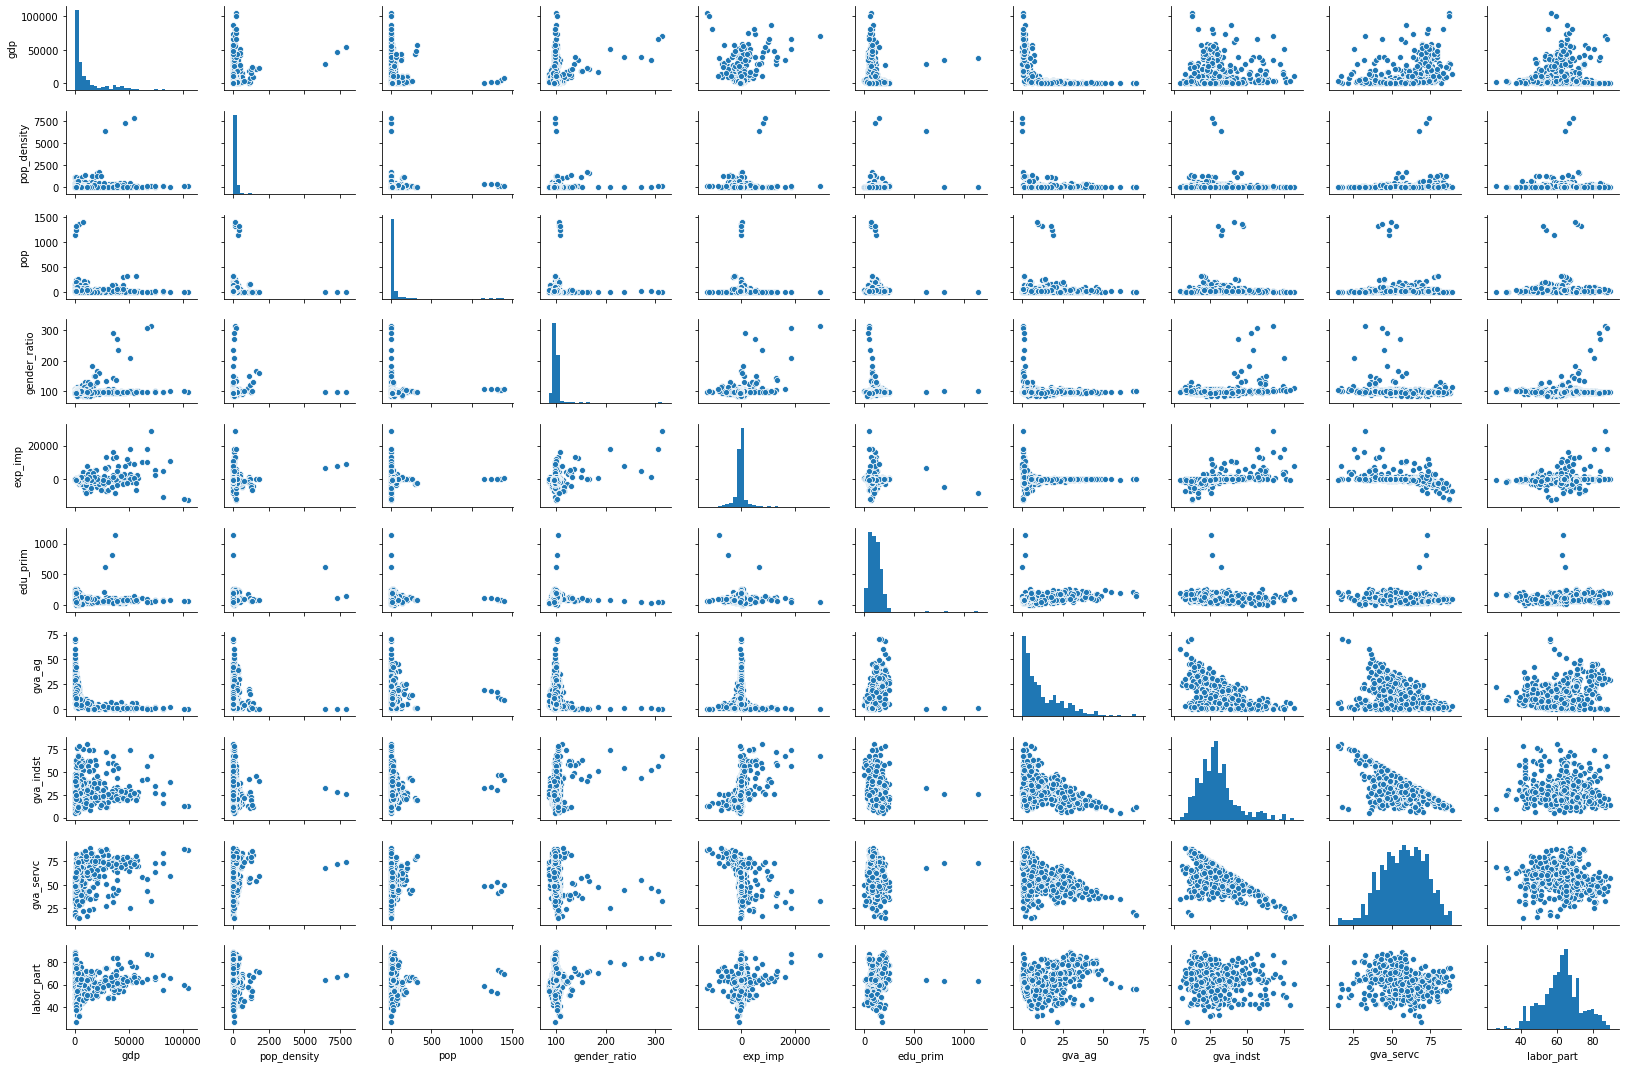

In [4]:
#Scatterplot matrix with histograms on the diagonal - most features right-skewed
sns.pairplot(UN.iloc[:, 2:12], height = 1.5, 
             aspect = 1.5, diag_kws = dict(bins = 30))

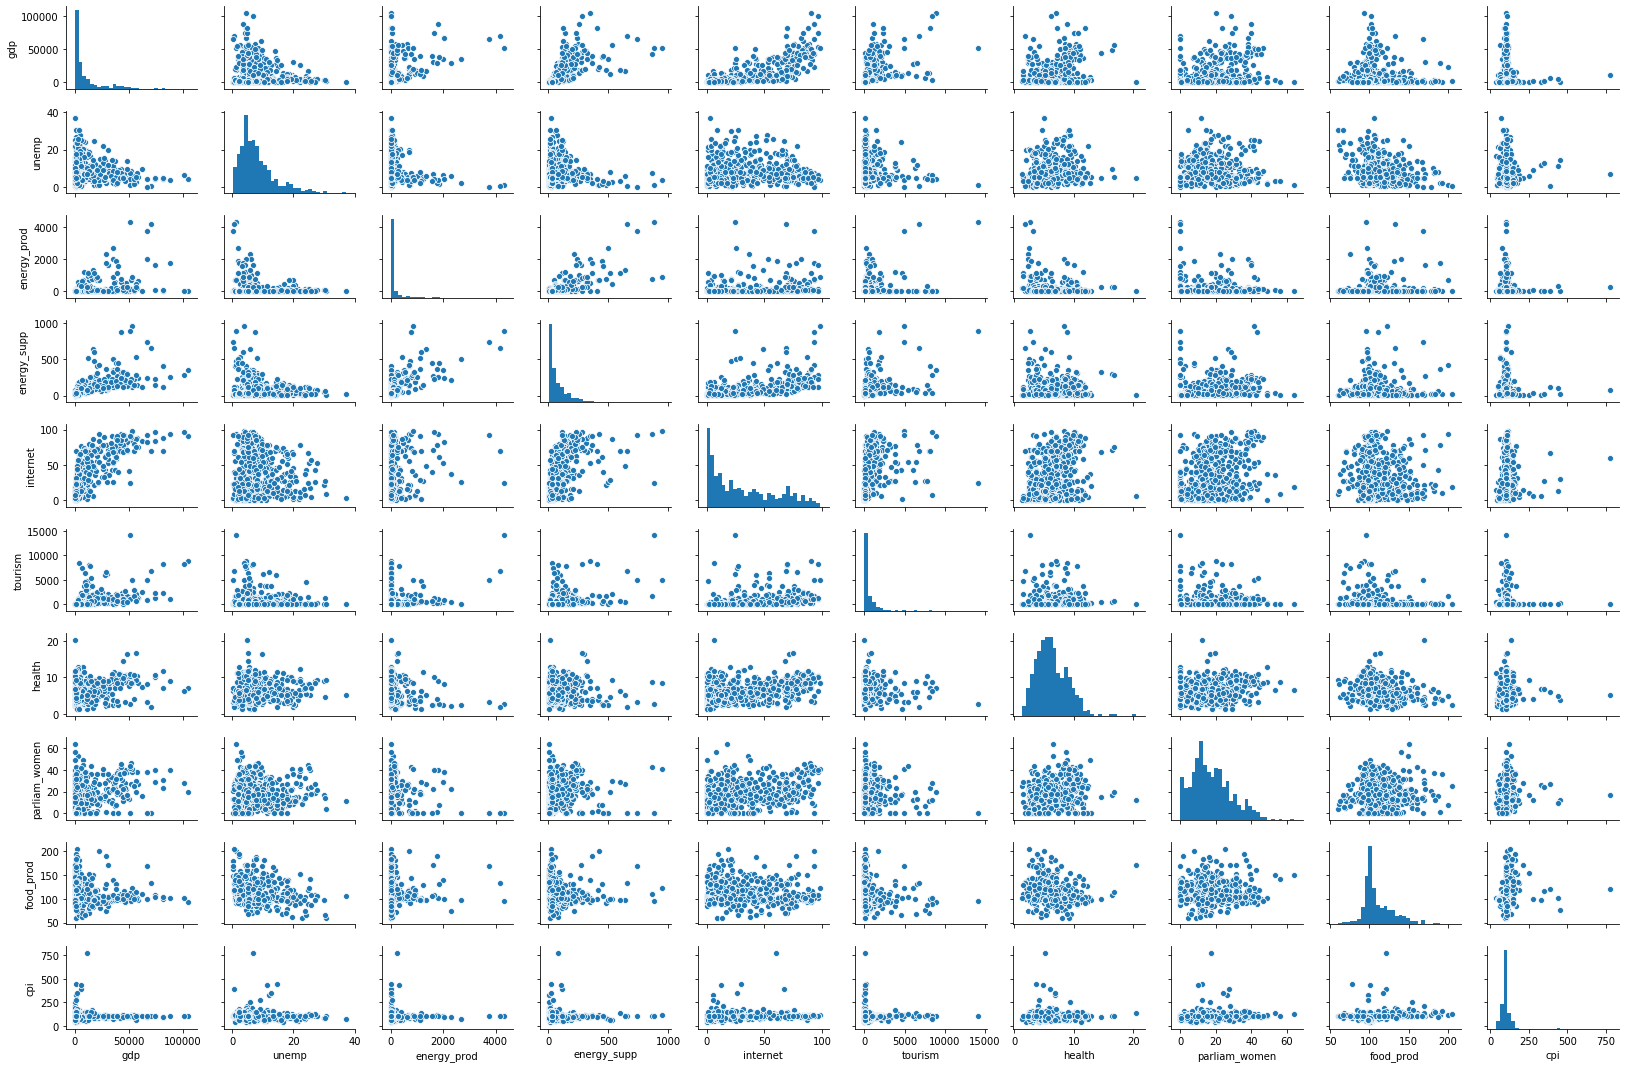

In [5]:
sns.pairplot(UN.iloc[:, [2,12,13,14,15,16,17,18,19,20]], 
             height = 1.5, aspect = 1.5, diag_kws = dict(bins = 30))

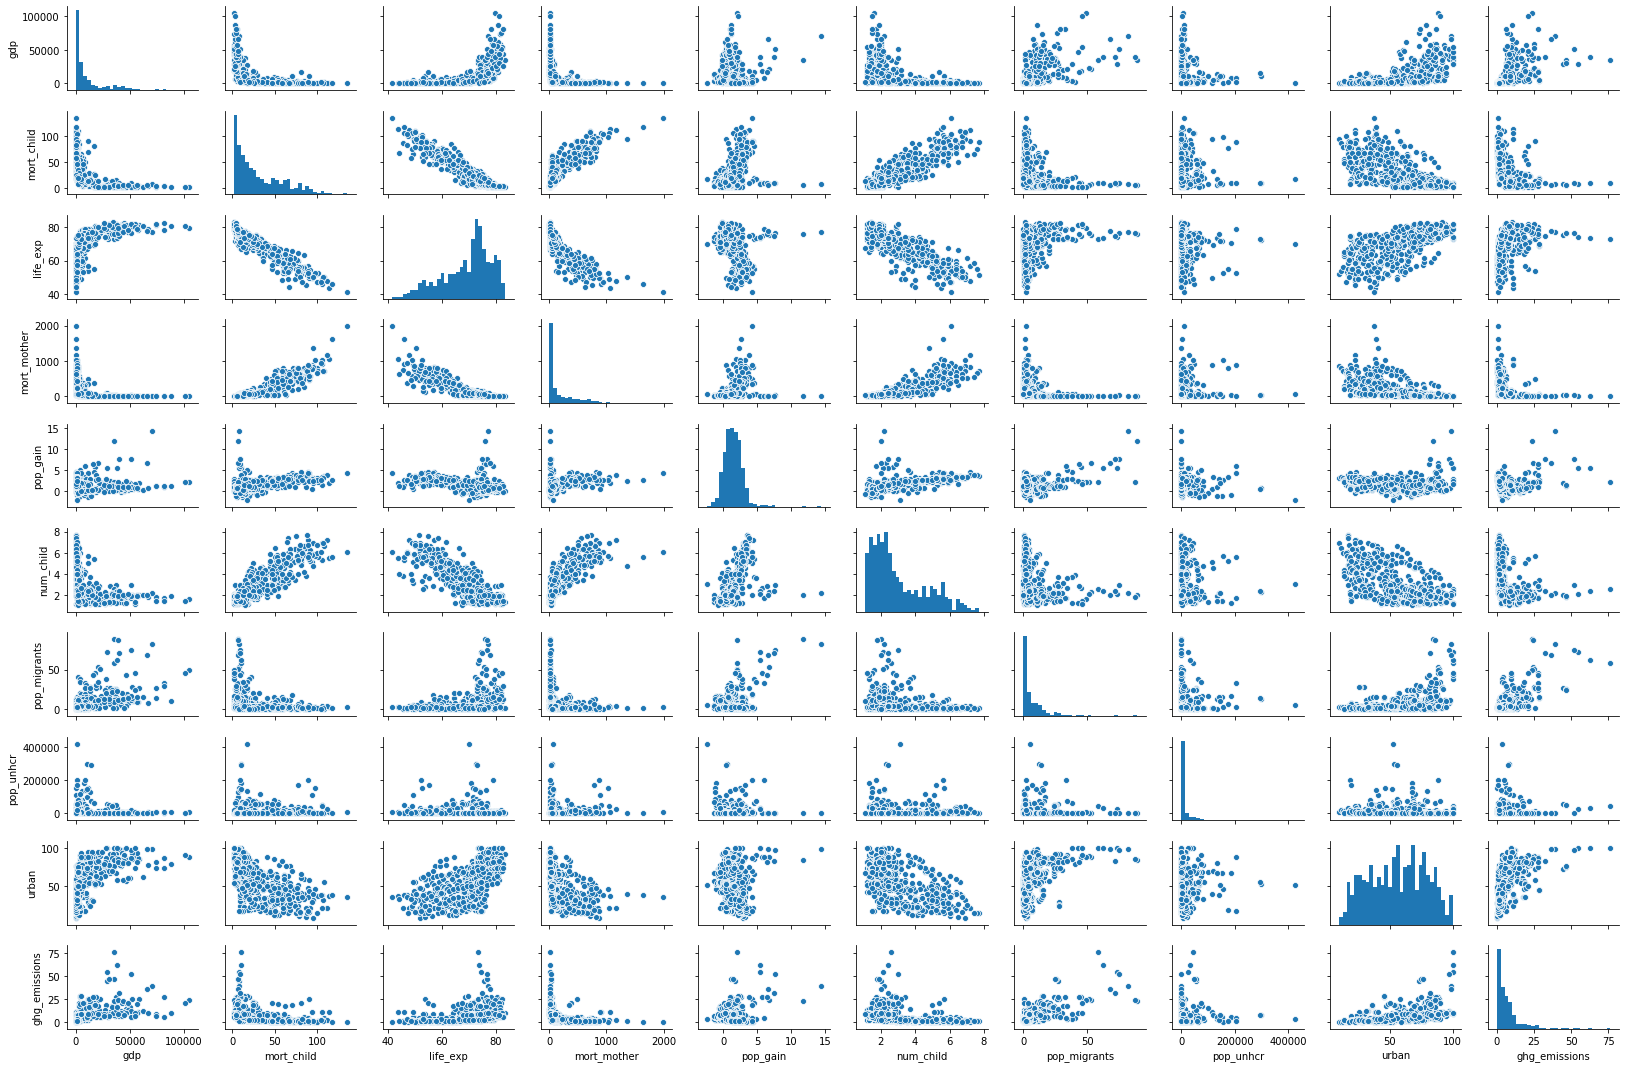

In [12]:
sns.pairplot(UN.iloc[:, [2,21,22,23,24,25,26,27,28,29]], height = 1.5, 
             aspect = 1.5, diag_kws = dict(bins = 30))

plt.savefig('pairplot.png', dpi = 100, bbox_inches = 'tight')

In [4]:
# Look at apparent outliers
UN[(UN.pop_density > 5000) | (UN['pop'] > 1000) | (UN.edu_prim > 500) | \
   (UN.energy_prod > 3000) | (UN.tourism > 10000) | (UN.cpi > 700)]

Country  Year      gdp  pop_density      pop  gender_ratio  \
120          China  2005   1730.0        140.8  1321.62         105.8   
121          China  2010   4487.0        144.8  1359.76         106.1   
122          China  2015   7920.0        148.8  1397.03         106.3   
264          India  2005    720.0        384.8  1144.12         107.6   
265          India  2010   1356.0        414.0  1230.98         107.8   
266          India  2015   1639.0        440.3  1309.05         107.6   
408  New Caledonia  2010  37266.0         13.7     0.25         102.9   
409  New Caledonia  2015  34094.0         14.7     0.27         101.9   
461          Qatar  2005  51489.0         74.5     0.86         208.4   
462          Qatar  2010  70306.0        153.3     1.78         313.7   
463          Qatar  2015  66347.0        213.7     2.48         306.6   
512      Singapore  2005  28372.0       6415.8     4.49          98.5   
513      Singapore  2010  46592.0       7248.9     5.07          97.4   
514      Singapore  2015  54937.0       7907.5     5.54          97.6   
622      Venezuela  2015  11054.0         35.3    31.16          99.2   

          exp_imp     edu_prim   gva_ag  gva_indst  ...     cpi  mort_child  \
120     77.178765    74.520914  11.9669    47.1715  ...  107.45        25.3   
121    133.672119    74.291510   9.8128    46.5791  ...  100.00        16.7   
122    425.119002    68.687170   9.1302    41.0902  ...  114.90        11.6   
264    -35.406251   121.023962  19.2367    32.2432  ...   65.80        59.9   
265   -105.299030   112.441991  18.3504    33.1142  ...  100.00        49.8   
266    -96.531072   105.815689  17.7085    29.8140  ...  147.70        41.3   
408  -8144.000000  1140.825908   1.3545    25.5451  ...  100.00        15.1   
409  -4781.481481   805.975331   1.4298    26.0053  ...  106.30        13.0   
461  18258.139535    81.384884   0.1341    74.5668  ...  105.20         9.4   
462  29058.988764    49.844382   0.1171    67.4903  ...  105.20         7.8   
463  18290.725806    52.606452   0.1539    56.3678  ...  105.20         7.2   
512   6596.659243   620.385214   0.0577    32.3615  ...   88.00         2.5   
513   8101.775148   112.110561   0.0389    27.6295  ...  100.00         2.2   
514   9005.956679   147.903259   0.0330    25.7424  ...  113.20         2.1   
622    -93.388960   111.568453   6.2593    30.5140  ...  772.00        13.8   

     life_exp  mort_mother  pop_gain  num_child  pop_migrants     pop_unhcr  \
120      73.1    48.000000       0.6        1.6           0.1    227.846128   
121      74.7    35.000000       0.6        1.6           0.1    221.442019   
122      75.7    27.000000       0.5        1.6           0.1    215.901591   
264      63.5   280.000000       1.7        3.1           0.5    124.443240   
265      65.6   215.000000       1.5        2.8           0.4    157.334806   
266      67.6   174.000000       1.2        2.4           0.4    157.185745   
408      75.2    21.384293       1.5        2.3          24.4  53837.160285   
409      76.3    41.164050       1.4        2.2          23.9  45072.289453   
461      76.6    21.000000       7.6        3.0          74.7     86.046512   
462      77.0    16.000000      14.4        2.2          81.8    711.797753   
463      77.7    13.000000       6.6        2.0          68.0    577.822581   
512      79.2    16.000000       2.8        1.3          38.1      0.890869   
513      81.2    11.000000       2.4        1.3          42.7      1.380671   
514      82.3    10.000000       1.7        1.2          46.0      0.180505   
622      73.9    95.000000       1.4        2.4           4.5   5612.804878   

     urban  ghg_emissions  
120   42.5       5.500000  
121   49.2       7.430000  
122   55.5       8.490000  
264   29.2       1.720000  
265   30.9       2.110000  
266   32.8       2.280000  
408   67.1      13.884047  
409   69.4      17.476507  
461   97.4      52.100000  
462   98.5      39.130000  
463 

In [5]:
# log- or square root-transform most features to alleviate skewness
UN2 = UN.copy()
UN2['log_gdp'] = np.log(UN2['gdp'])
UN2['log_pop_density'] = np.log(UN2['pop_density'])
UN2['log_pop'] = np.log(UN2['pop'])
UN2['log_gender_ratio'] = np.log(UN2['gender_ratio'])
UN2['log_energy_prod'] = np.log(UN2['energy_prod'] + 0.25)
UN2['log_energy_supp'] = np.log(UN2['energy_supp'])
UN2['sqrt_internet'] = np.sqrt(UN2['internet'])
UN2['log_edu_prim'] = np.log(UN2['edu_prim'])
UN2['sqrt_gva_ag'] = np.sqrt(UN2['gva_ag'])
UN2['sqrt_gva_indst'] = np.sqrt(UN2['gva_indst'])
UN2['sqrt_unemp'] = np.sqrt(UN2['unemp'])
UN2['log_tourism'] = np.log(UN2['tourism'] + 0.25)
UN2['log_health'] = np.log(UN2['health'])
UN2['sqrt_parliam_women'] = np.sqrt(UN2['parliam_women'])
UN2['log_cpi'] = np.log(UN2['cpi'])
UN2['log_mort_child'] = np.log(UN2['mort_child'])
UN2['log_mort_mother'] = np.log(UN2['mort_mother'])
UN2['log_mort_child'] = np.log(UN2['mort_child'])
UN2['log_num_child'] = np.log(UN2['num_child'])
UN2['log_pop_migrants'] = np.log(UN2['pop_migrants'])
UN2['log_pop_unhcr'] = np.log(UN2['pop_unhcr'])
UN2['log_ghg_emissions'] = np.log(UN2['ghg_emissions'])

UN2 = UN2.drop(columns = ['gdp', 'pop_density', 'pop', 'gender_ratio', 'energy_prod', 
                         'energy_supp', 'internet', 'edu_prim', 'gva_ag', 'gva_indst', 
                         'unemp', 'tourism', 'health', 'parliam_women', 'cpi', 'mort_child',
                         'mort_mother', 'mort_child', 'num_child', 'pop_migrants', 'pop_unhcr',
                         'ghg_emissions'])

UN2.head()

Country  Year      exp_imp  gva_servc  labor_part  food_prod  life_exp  \
0  Afghanistan  2005  -237.674511    38.7936        64.3      106.6      56.9   
1  Afghanistan  2010  -165.486111    49.8430        63.3      116.2      60.0   
2  Afghanistan  2015  -211.944280    54.6642        65.3      119.6      62.3   
3      Albania  2005  -635.064935    49.7872        57.9       98.0      74.8   
4      Albania  2010 -1038.435374    50.6513        54.3      119.1      75.6   

   pop_gain  urban   log_gdp  ...  log_tourism  log_health  \
0       4.4   22.7  5.575949  ...     1.592685    2.297402   
1       2.8   23.7  6.324359  ...     1.677875    2.148233   
2       3.2   24.8  6.415097  ...     1.039761    2.311941   
3      -0.3   46.7  7.869019  ...     5.655867    1.847320   
4      -0.9   52.2  8.307953  ...     6.405248    1.611436   

   sqrt_parliam_women   log_cpi  log_mort_child  log_mort_mother  \
0            5.244044  4.264087        4.494239         6.710523   
1            5.224940  4.605170        4.339902         6.369901   
2            5.263079  4.883559        4.228293         5.981414   
3            2.529822  4.462454        3.049273         3.401197   
4            4.049691  4.605170        2.821379         3.401197   

   log_num_child  log_pop_migrants  log_pop_unhcr  log_ghg_emissions  
0       1.974081         -1.203973       8.758735          -0.274437  
1       1.856298         -0.916291      10.637446           0.058269  
2       1.667707          0.405465      10.648482           0.336472  
3       0.641854          0.741937       3.396859           0.985817  
4       0.470004          0.587787       3.516710           1.040277  

[5 rows x 30 columns]

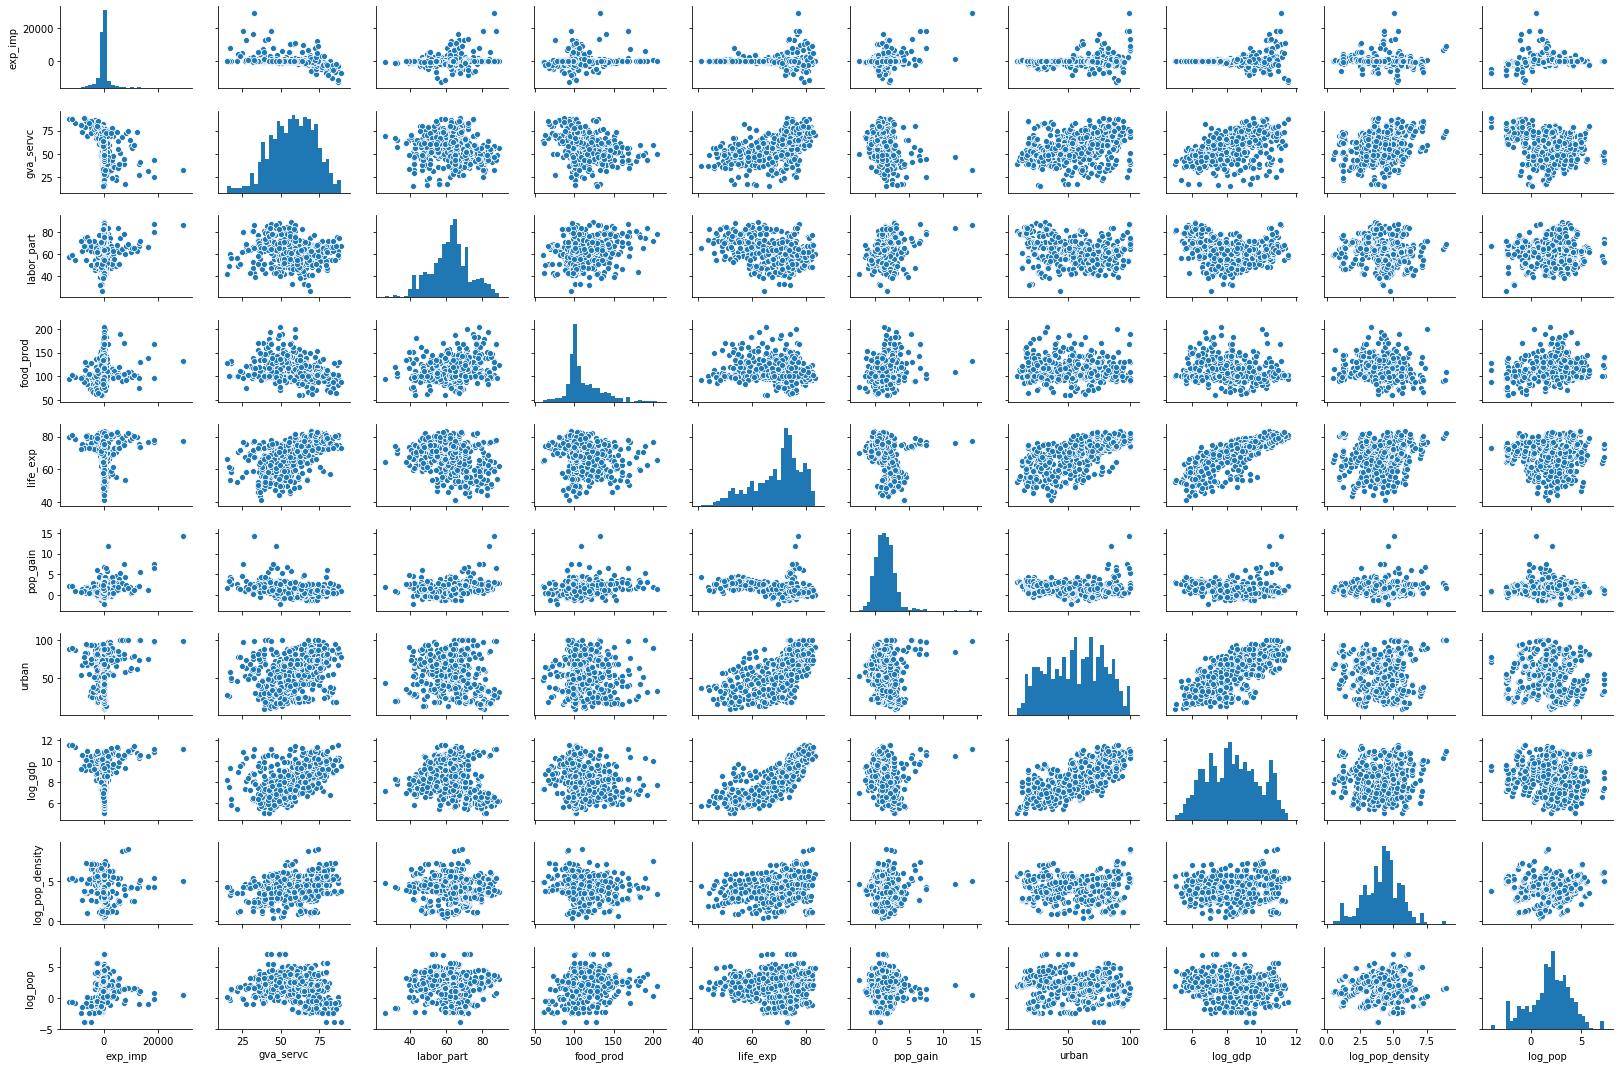

In [9]:
# Significantly improved normality for most features
sns.pairplot(UN2.iloc[:, 2:12], height = 1.5, 
             aspect = 1.5, diag_kws = dict(bins = 30))

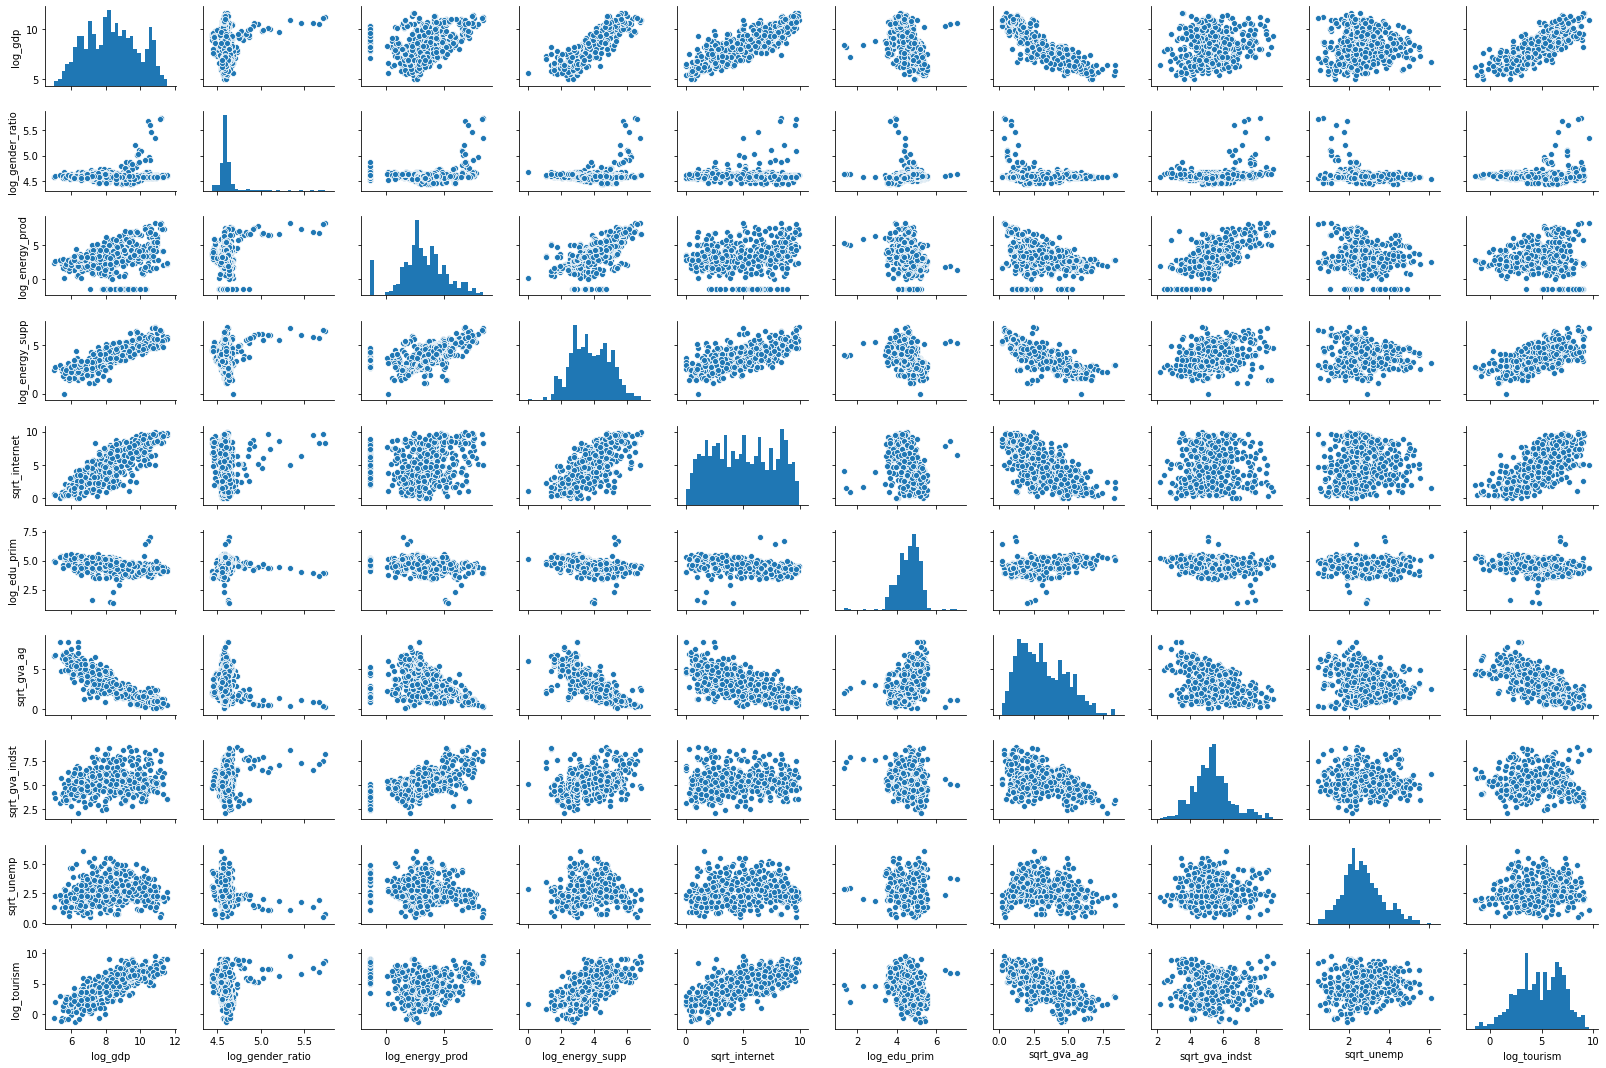

In [10]:
sns.pairplot(UN2.iloc[:, [9,12,13,14,15,16,17,18,19,20]], 
             height = 1.5, aspect = 1.5, diag_kws = dict(bins = 30))

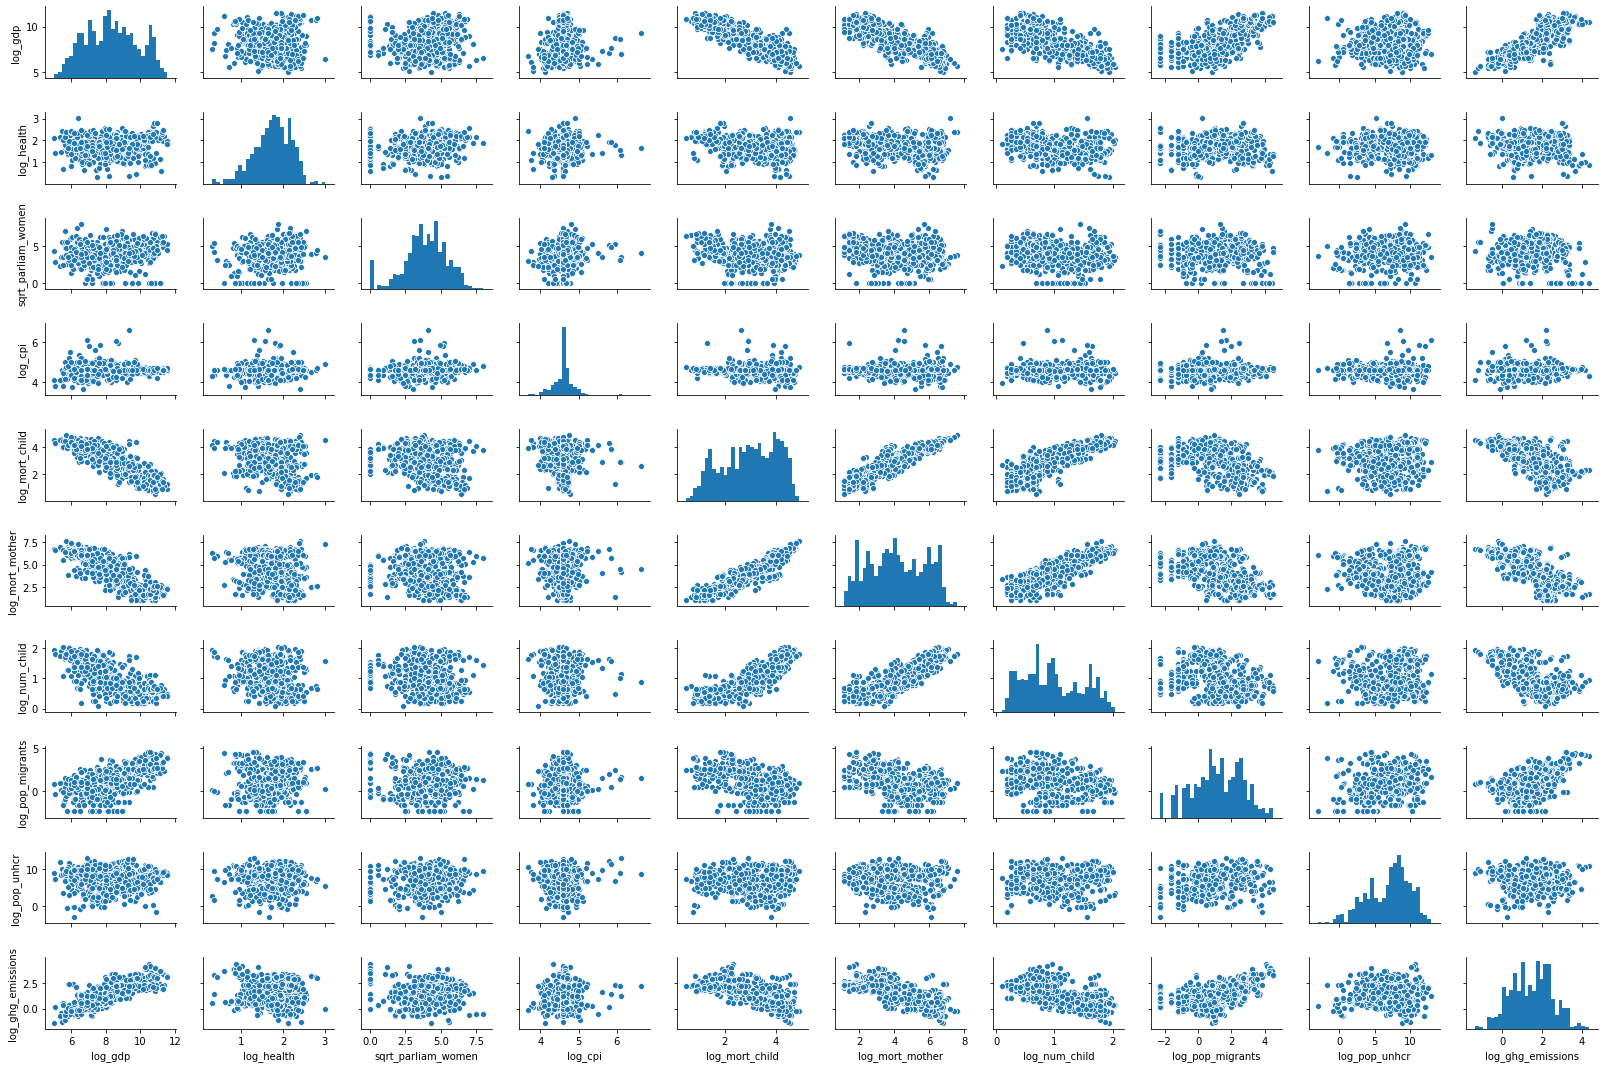

In [11]:
sns.pairplot(UN2.iloc[:, [9,21,22,23,24,25,26,27,28,29]], height = 1.5, 
             aspect = 1.5, diag_kws = dict(bins = 30))

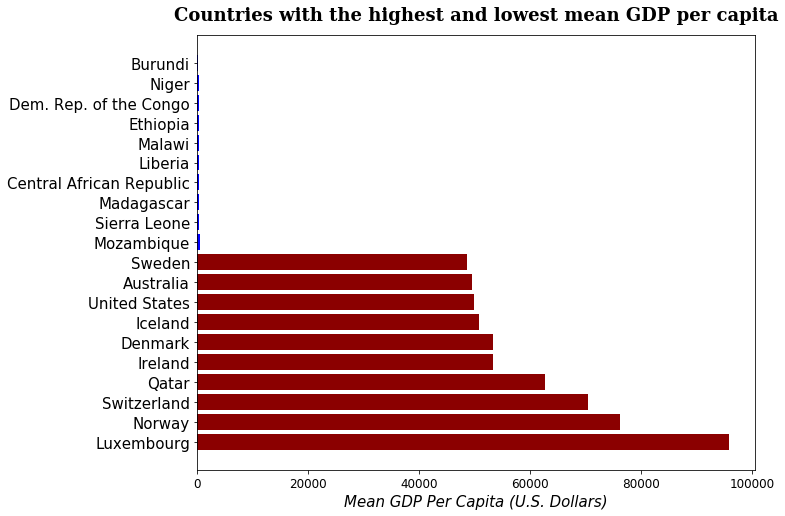

In [110]:
#Plot bar chart of countries with highest and lowest mean GDP (averaged over the 3 years)
top_country_gdp = UN.groupby('Country', as_index = False).gdp.mean()\
    .sort_values('gdp', ascending = False).reset_index().iloc[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 
                                                                   -10, -9, -8, -7, -6, -5, -4, -3, -2, -1],
                                                                  :]

plt.figure(figsize=(10,8))
plt.barh(y = 'Country', width = 'gdp', data = top_country_gdp, color = ['darkred', 'darkred', 'darkred', 
                                                                        'darkred', 'darkred', 'darkred', 
                                                                        'darkred', 'darkred', 'darkred', 
                                                                        'darkred', 'blue', 'blue', 'blue', 
                                                                        'blue', 'blue', 'blue', 'blue', 
                                                                        'blue', 'blue', 'blue'])
plt.xlabel('Mean GDP Per Capita (U.S. Dollars)', fontsize = 15, style = 'italic')
plt.ylabel('', fontsize = 14, style = 'italic')
plt.title('Countries with the highest and lowest mean GDP per capita', 
          fontsize = 18, fontweight = 'bold', family = 'serif', y = 1.02)
plt.yticks(top_country_gdp.Country, fontsize = 15)
plt.xticks(fontsize = 12)

plt.savefig('GDP_Top_Countries2.png', dpi = 100, bbox_inches = 'tight')
plt.show()
plt.close()

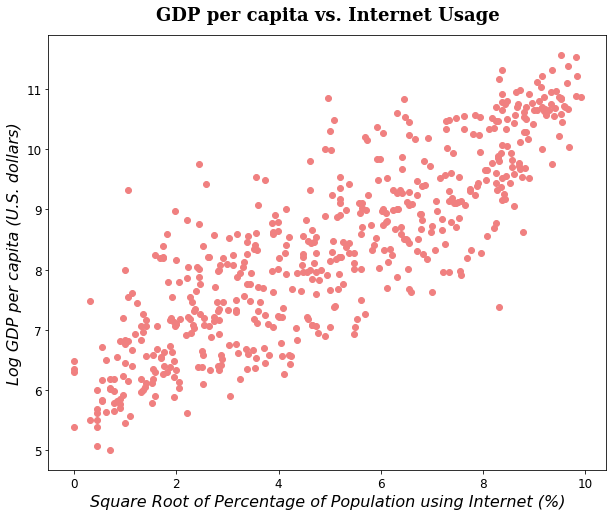

In [63]:
#Scatterplot of GDP vs. Internet
plt.figure(figsize = (10,8))
plt.scatter(UN2.sqrt_internet, UN2.log_gdp, color = 'lightcoral')
plt.title("GDP per capita vs. Internet Usage", fontsize = 18, 
          fontweight = 'bold', family = 'serif', y = 1.02)
plt.xlabel("Square Root of Percentage of Population using Internet (%)", fontsize = 16, style = 'italic')
plt.ylabel("Log GDP per capita (U.S. dollars)", fontsize = 16, style = 'italic')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('GDP_vs_Internet.png', dpi = 100, bbox_inches = 'tight')
plt.show()
plt.close()

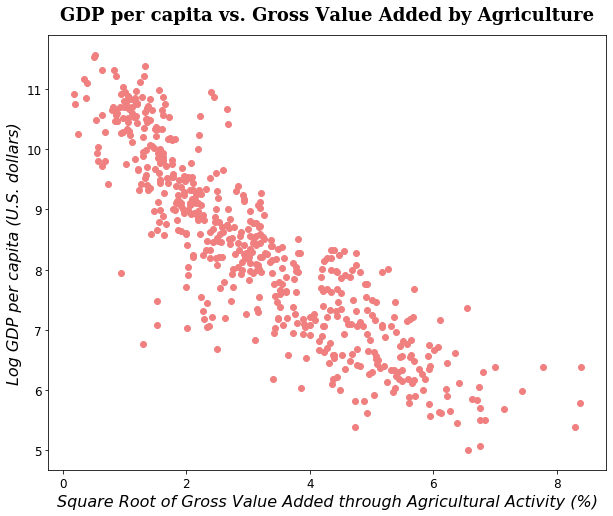

In [65]:
#Scatterplot of GDP vs. GVA Agriculture
plt.figure(figsize = (10,8))
plt.scatter(UN2.sqrt_gva_ag, UN2.log_gdp, color = 'lightcoral')
plt.title("GDP per capita vs. Gross Value Added by Agriculture", fontsize = 18, 
          fontweight = 'bold', family = 'serif', y = 1.02)
plt.xlabel("Square Root of Gross Value Added through Agricultural Activity (%)", fontsize = 16, style = 'italic')
plt.ylabel("Log GDP per capita (U.S. dollars)", fontsize = 16, style = 'italic')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('GDP_vs_gva_ag.png', dpi = 100, bbox_inches = 'tight')
plt.show()
plt.close()

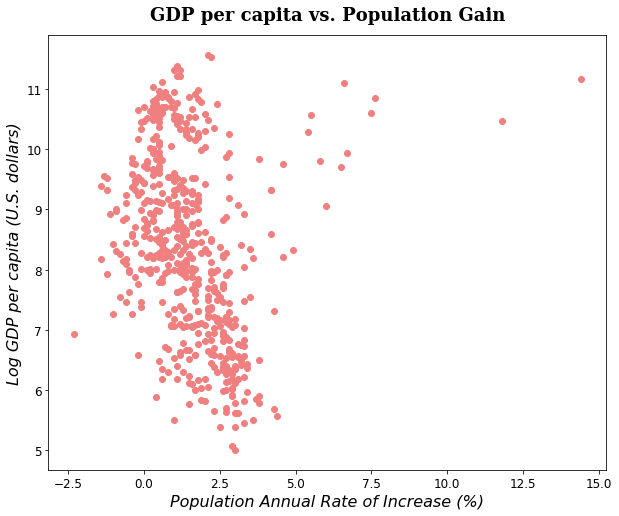

In [116]:
#Scatterplot of GDP vs. Population Gain
plt.figure(figsize = (10,8))
plt.scatter(UN2.pop_gain, UN2.log_gdp, color = 'lightcoral')
plt.title("GDP per capita vs. Population Gain", fontsize = 18, 
          fontweight = 'bold', family = 'serif', y = 1.02)
plt.xlabel("Population Annual Rate of Increase (%)", fontsize = 16, style = 'italic')
plt.ylabel("Log GDP per capita (U.S. dollars)", fontsize = 16, style = 'italic')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('GDP_vs_pop_gain.png', dpi = 100, bbox_inches = 'tight')
plt.show()
plt.close()

In [119]:
#Which country or countries had the extreme population gain?
UN2.loc[UN2.pop_gain > 10, ['Country', 'pop_gain']]

Country  pop_gain
462                 Qatar      14.4
600  United Arab Emirates      11.8

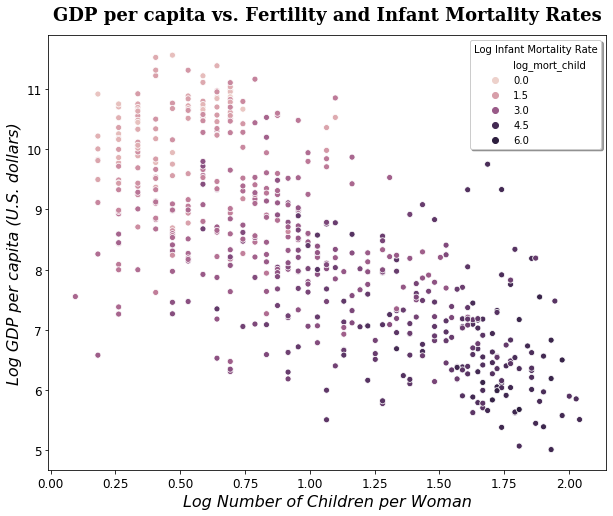

In [130]:
#Scatterplot of GDP vs. fertility rate, colored by infant mortality rate
#GDP shows negative association with fertility rate overall, but positive when 
#infant mortality accounted for
plt.figure(figsize = (10,8))
sns.scatterplot(UN2.log_num_child, UN2.log_gdp, hue = UN2.log_mort_child)
plt.title("GDP per capita vs. Fertility and Infant Mortality Rates", fontsize = 18, 
          fontweight = 'bold', family = 'serif', y = 1.02)
plt.xlabel("Log Number of Children per Woman", fontsize = 16, style = 'italic')
plt.ylabel("Log GDP per capita (U.S. dollars)", fontsize = 16, style = 'italic')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(title = 'Log Infant Mortality Rate', shadow = True)

plt.savefig('GDP_vs_fertility_mortality.png', dpi = 100, bbox_inches = 'tight')
plt.show()
plt.close()

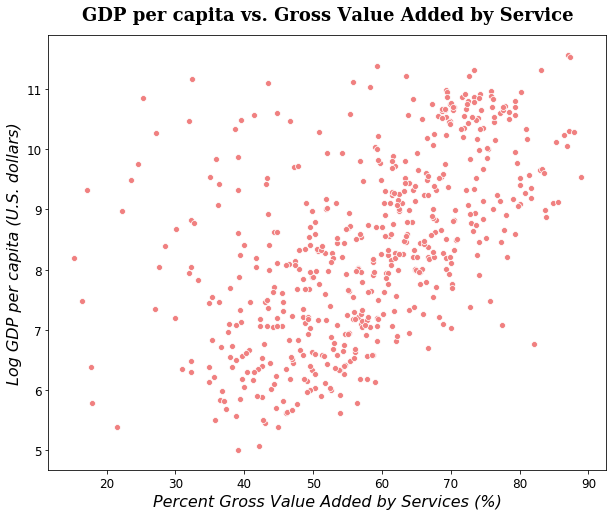

In [141]:
#Scatterplot of GDP vs. GVA Service
plt.figure(figsize = (10,8))
sns.scatterplot(UN2.gva_servc, UN2.log_gdp, color = 'lightcoral')
plt.title("GDP per capita vs. Gross Value Added by Service", fontsize = 18, 
          fontweight = 'bold', family = 'serif', y = 1.02)
plt.xlabel("Percent Gross Value Added by Services (%)", fontsize = 16, style = 'italic')
plt.ylabel("Log GDP per capita (U.S. dollars)", fontsize = 16, style = 'italic')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('GDP_vs_gva_servc.png', dpi = 100, bbox_inches = 'tight')
plt.show()
plt.close()

In [59]:
# center and scale features of UN2 and perform PCA; extract scores, loadings, and % variance explained
UN2_scaled = StandardScaler().fit_transform(UN2.iloc[:, 2:])
pca = PCA(random_state = 257).fit(UN2_scaled)
scores = pca.transform(UN2_scaled)
perc_var_explained = pca.explained_variance_ratio_
loadings = pca.components_.T  #loadings matrix with shape (n_features x n_PCs)

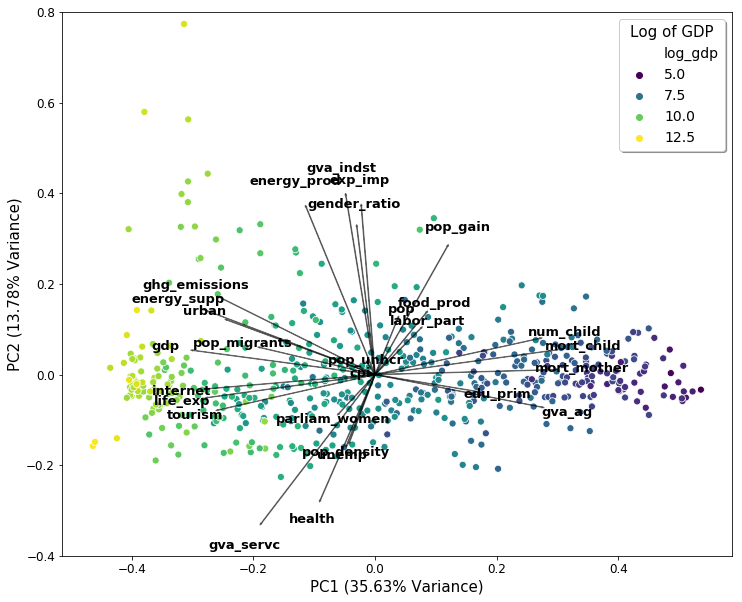

In [99]:
# biplot showing PCA scores and loadings for UN2
plt.figure(figsize = (12, 10))
sns.scatterplot(scores[:, 0] / (np.max(scores[:, 0]) - np.min(scores[:, 0])), 
                scores[:, 1] / (np.max(scores[:, 1]) - np.min(scores[:, 1])), 
                hue = UN2['log_gdp'], palette = 'viridis', s = 50, edgecolors = 'gray')
for i in range(loadings.shape[0]):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color = 'black', alpha = 0.5)
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, 
             UN2.columns[2:][i].replace('sqrt_', '').replace('log_', ''),
             color = 'black', ha = 'center', va = 'center', fontsize = 13, fontweight = 'bold')
plt.xlabel('PC1 ({}% Variance)'.format((100 * perc_var_explained[0]).round(2)), fontsize = 15)
plt.ylabel('PC2 ({}% Variance)'.format((100 * perc_var_explained[1]).round(2)), fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylim(-0.4, 0.8)
plt.legend(title = 'Log of GDP', shadow = True, fontsize = 14, title_fontsize = 15)

plt.savefig('pca_biplot.png', dpi = 100, bbox_inches = 'tight')
plt.show()
plt.close()

In [106]:
# Outliers in PC2
UN2.Country[(scores[:, 1] / (np.max(scores[:, 1]) - np.min(scores[:, 1])) > 0.5)]

461    Qatar
462    Qatar
463    Qatar
Name: Country, dtype: object

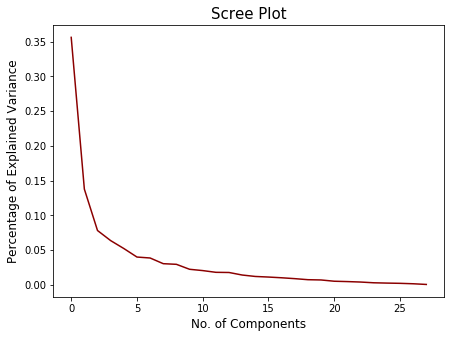

In [111]:
# Scree plot
plt.figure(figsize = (7, 5))
plt.plot(perc_var_explained, color = 'darkred')
plt.xlabel('No. of Components', fontsize = 12)
plt.ylabel('Percentage of Explained Variance', fontsize = 12);
plt.title('Scree Plot', fontsize = 15)
plt.show()
plt.close()

In [13]:
UN2.to_pickle('UN_data_transform.pickle')